## Importeer bibliotheken

In [2]:
import os
import json
import cv2
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from matplotlib.patches import Polygon
import numpy as np
from pathlib import Path

## Laad COCO annotaties en toon de eerste 4 afbeeldingen met annotaties

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


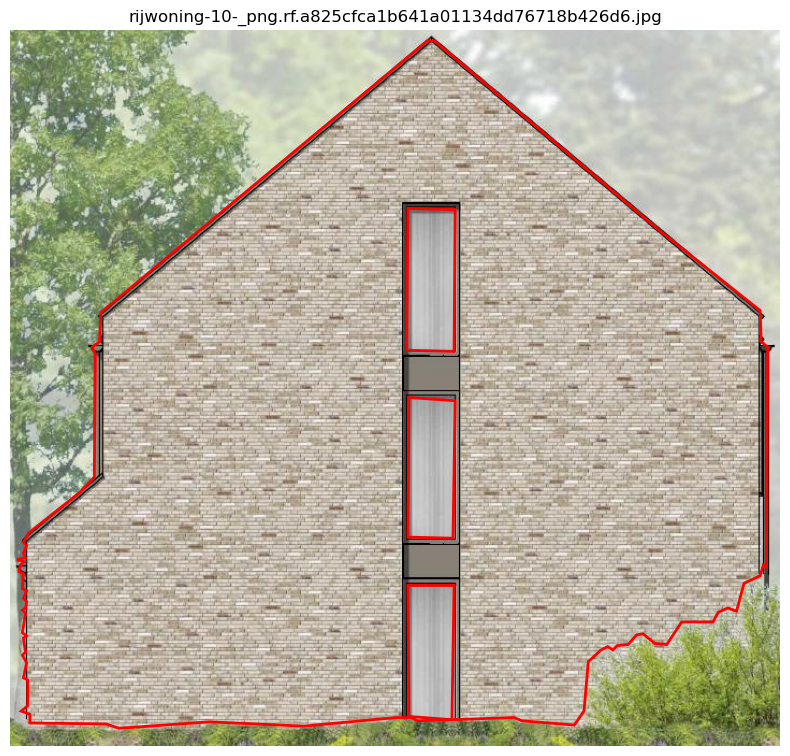

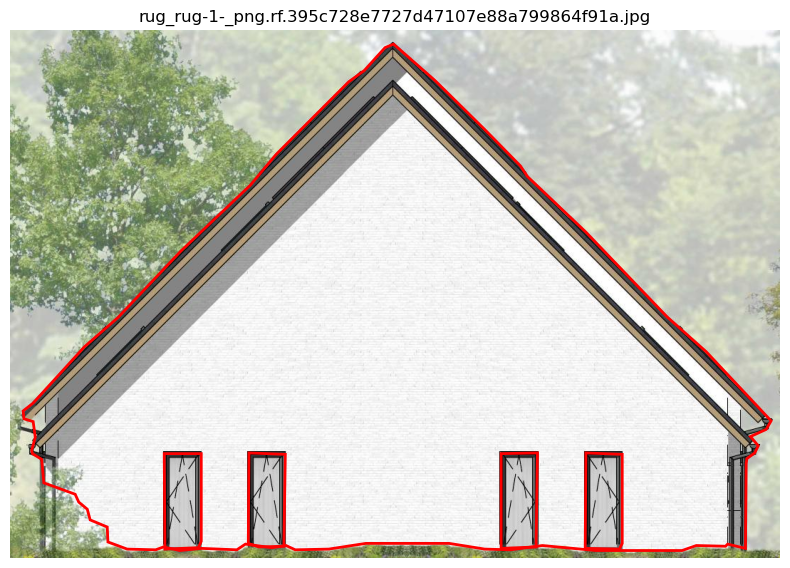

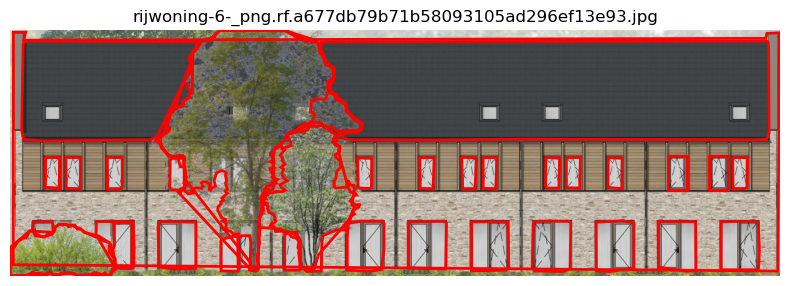

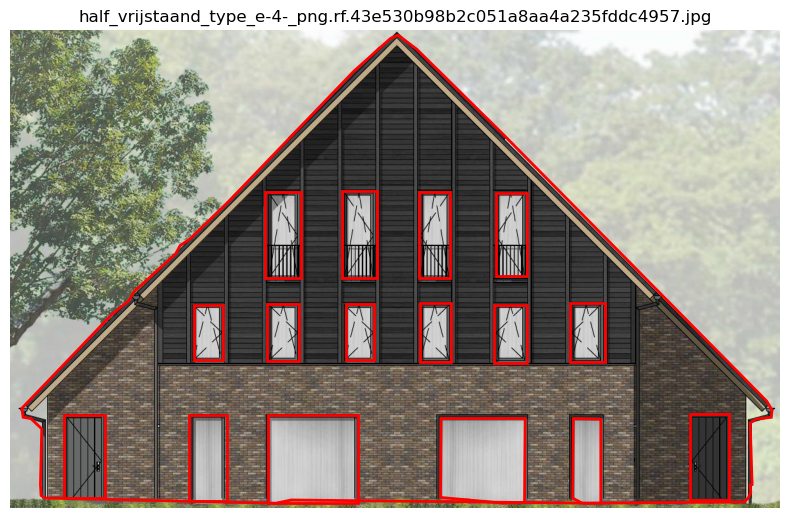

In [3]:
# === Padconfiguratie ===
base_dir = Path().resolve().parent  # Ga 1 niveau omhoog vanuit 'valideren'
annotations_path = base_dir / "Gelabelde_foto's" / "_annotations.coco.json"
images_dir = base_dir / "Gelabelde_foto's"

# === Laad COCO-annotaties ===
coco = COCO(str(annotations_path))

# === Selecteer een paar afbeeldingen om te tonen ===
image_ids = coco.getImgIds()

for i in range(min(4, len(image_ids))):
    img_meta = coco.loadImgs(image_ids[i])[0]
    img_path = images_dir / img_meta["file_name"]

    img = cv2.imread(str(img_path))
    if img is None:
        print(f"Kon afbeelding niet laden: {img_path}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # === Haal annotaties op ===
    ann_ids = coco.getAnnIds(imgIds=img_meta["id"])
    anns = coco.loadAnns(ann_ids)

    # === Visualisatie ===
    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    ax = plt.gca()

    for ann in anns:
        if "segmentation" in ann and isinstance(ann["segmentation"], list):
            for seg in ann["segmentation"]:
                polygon = np.array(seg).reshape((-1, 2))
                ax.add_patch(
                    Polygon(polygon, edgecolor="red", facecolor="none", linewidth=2)
                )
        elif "bbox" in ann:
            x, y, w, h = ann["bbox"]
            ax.add_patch(
                plt.Rectangle((x, y), w, h, linewidth=2, edgecolor="blue", facecolor="none")
            )

    plt.title(img_meta["file_name"])
    plt.axis("off")
    plt.tight_layout()
    plt.show()

## Toon lijst van afbeeldingen uit de COCO annotatie JSON

Deze code leest het COCO JSON bestand in als dictionary en print een genummerde lijst van alle bestandsnamen van afbeeldingen die daarin staan.

In [4]:
# === Laad COCO JSON-bestand in als dictionary ===
with open("../Gelabelde_foto's/_annotations.coco.json") as f:
    gt_data = json.load(f)

# === Print genummerde lijst van bestandsnamen uit 'images' ===
for idx, image in enumerate(gt_data["images"], start=1):
    print(f"{idx}: {image['file_name']}")

1: rijwoning-10-_png.rf.a825cfca1b641a01134dd76718b426d6.jpg
2: rug_rug-1-_png.rf.395c728e7727d47107e88a799864f91a.jpg
3: rijwoning-6-_png.rf.a677db79b71b58093105ad296ef13e93.jpg
4: half_vrijstaand_type_e-4-_png.rf.43e530b98b2c051a8aa4a235fddc4957.jpg


## Beschikbare Categorieën in de Geannoteerde Dataset

In dit overzicht zie je alle categorieën die zijn gedefinieerd in het COCO JSON-bestand (`categories`-sleutel).  
Elke categorie heeft een unieke `id` en een naam (zoals `'window'`, `'door'`, etc.).


In [5]:
# Print de eerste annotatie uit de COCO JSON
print(gt_data['annotations'][0])

{'id': 0, 'image_id': 0, 'category_id': 1, 'bbox': [6, 10, 699, 640], 'area': 447360, 'segmentation': [[388, 10, 84, 263, 83, 290, 76, 295, 79, 302, 78, 416, 65, 430, 17, 468, 12, 477, 15, 480, 12, 487, 14, 491, 6, 493, 13, 495, 9, 498, 8, 504, 12, 506, 11, 520, 15, 522, 12, 529, 15, 532, 14, 538, 11, 540, 14, 543, 11, 561, 15, 564, 12, 566, 14, 579, 11, 582, 15, 589, 12, 603, 16, 605, 16, 629, 10, 634, 18, 637, 18, 645, 89, 646, 101, 650, 185, 644, 273, 648, 359, 640, 373, 640, 379, 643, 469, 640, 476, 643, 525, 647, 534, 634, 538, 588, 550, 577, 556, 574, 561, 577, 565, 573, 575, 572, 583, 563, 589, 562, 600, 571, 611, 572, 625, 551, 654, 551, 659, 542, 668, 538, 676, 541, 683, 515, 698, 508, 701, 498, 704, 500, 705, 295, 699, 290, 698, 261, 605, 187, 395, 10]], 'iscrowd': 0}


De output toont de eerste annotatie in het COCO-annotatiebestand. 

Hier zie je de belangrijkste onderdelen:

- **id**: Unieke ID van deze annotatie (0).
- **image_id**: Verwijzing naar de afbeelding waarop deze annotatie betrekking heeft (0).
- **category_id**: De klasse van het object, bijvoorbeeld 1 kan bijvoorbeeld "window" of "door" betekenen.
- **bbox**: De bounding box van het object in het formaat [x, y, breedte, hoogte].
- **area**: Het oppervlak van de bounding box.
- **segmentation**: De precieze contouren van het object als een lijst van punten (x,y), wat een polygon vormt.
- **iscrowd**: Geeft aan of het object een groep is (0 betekent geen groep).

Deze informatie wordt gebruikt om de objecten in de afbeelding nauwkeurig te labelen voor evaluatie en detectie.

## Hier worden alle categorieën weergegeven die in het COCO JSON-bestand zijn gedefinieerd.

In [6]:
# Print alle categorieën met id en naam uit de COCO JSON
for cat in gt_data['categories']:
    print(f"{cat['id']}: {cat['name']}")

0: objects
1: facade
2: roof
3: tree
4: window


Hier worden alle categorieën weergegeven die in het COCO JSON-bestand zijn gedefinieerd. Elke categorie heeft een unieke `id` en een bijbehorende naam. In deze context betekent het:

- **0: objects** – Algemene objecten
- **1: facade** – Gevel van een gebouw
- **2: roof** – Dak
- **3: tree** – Boom
- **4: window** – Venster (wordt ook gebruikt voor deuren in de dataset)

Belangrijk: in deze dataset zijn **ramen en deuren gecombineerd onder de categorie "window"**. Dat is cruciaal voor het correct vergelijken met de detecties.

## Inspectie van de detectie-output voor één afbeelding

We openen het detectiebestand van een specifiek beeld (bijvoorbeeld `rijwoning (10)`) en bekijken de eerste paar gedetecteerde objecten om inzicht te krijgen in de structuur van de detectie-output.

In [7]:
# Relatief pad naar detectie JSON, vanuit je huidige werkdirectory
detectie_path = os.path.join("..", "Old_school_AI_test_foto's", "model_3", "detectie_rijwoning (10).json")

# Laad JSON data
with open(detectie_path, "r") as f:
    detectie_data = json.load(f)

# Print de eerste 2 detecties
for item in detectie_data[:2]:
    print(item)

{'label': 'Deur', 'bounding_box': [0, 89, 50, 116]}
{'label': 'Raam', 'bounding_box': [84, 54, 45, 53]}


## Structuur van een detectie-item

De structuur van elk item bevat:

- **label**: De gedetecteerde klasse, zoals `"Deur"` of `"Raam"`.
- **bbox**: De bounding box van het gedetecteerde object in het formaat `[x, y, breedte, hoogte]`.

Deze detecties worden later vergeleken met de ground-truth annotaties van categorie `"window"` (die dus ook deuren bevat).

## Functie om IoU (Intersection over Union) te berekenen
Intersection over Union (IoU) Formula

Given two boxes:
- Box A: $(x_{A1}, y_{A1}, w_A, h_A)$  
- Box B: $(x_{B1}, y_{B1}, w_B, h_B)$  

**IoU** wordt berekend als:

$$
\text{IoU} = \frac{\text{Intersection Area}}{\text{Union Area}} = \frac{|A \cap B|}{|A| + |B| - |A \cap B|}
$$

### Stappen:
1. **Bereken coördinaten overlapgebied**:
   \begin{align*}
   x_{\text{left}} &= \max(x_{A1}, x_{B1}) \\
   y_{\text{top}} &= \max(y_{A1}, y_{B1}) \\
   x_{\text{right}} &= \min(x_{A1} + w_A, x_{B1} + w_B) \\
   y_{\text{bottom}} &= \min(y_{A1} + h_A, y_{B1} + h_B)
   \end{align*}

2. **Bereken oppervlaktes**:
   \begin{align*}
   \text{Intersection Area} &= 
   \begin{cases}
   (x_{\text{right}} - x_{\text{left}}) \times (y_{\text{bottom}} - y_{\text{top}}) & \text{als } x_{\text{right}} > x_{\text{left}} \text{ en } y_{\text{bottom}} > y_{\text{top}} \\
   0 & \text{anders}
   \end{cases} \\
   \text{Union Area} &= w_A \cdot h_A + w_B \cdot h_B - \text{Intersection Area}
   \end{align*}

In [8]:
def calculate_iou(box_a, box_b):
    """
    Berekent de Intersection over Union (IoU) tussen twee bounding boxes.
    
    Parameters:
        box_a (list or tuple): Bounding box in [x, y, w, h]-formaat.
        box_b (list or tuple): Bounding box in [x, y, w, h]-formaat.
    
    Returns:
        float: IoU-waarde tussen 0.0 en 1.0.
    """
    # Zet om naar [x1, y1, x2, y2]
    x1_a, y1_a, w_a, h_a = box_a
    x2_a, y2_a = x1_a + w_a, y1_a + h_a

    x1_b, y1_b, w_b, h_b = box_b
    x2_b, y2_b = x1_b + w_b, y1_b + h_b

    # Bereken overlapcoördinaten
    x_left = max(x1_a, x1_b)
    y_top = max(y1_a, y1_b)
    x_right = min(x2_a, x2_b)
    y_bottom = min(y2_a, y2_b)

    # Check of er overlap is
    if x_right < x_left or y_bottom < y_top:
        return 0.0  # Geen overlap

    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    box_a_area = w_a * h_a
    box_b_area = w_b * h_b
    union_area = box_a_area + box_b_area - intersection_area

    return intersection_area / union_area

## Functie om detecties te matchen met ground-truth ramen

In deze stap vergelijken we de gedetecteerde objecten ('Raam' en 'Deur') met de handmatig gelabelde objecten (alleen 'window', oftewel `category_id == 4`).

Een detectie wordt als correct beschouwd als deze voldoende overlap (IoU ≥ 0.5) heeft met een ground-truth raam, en één-op-één wordt gematcht.  
Elke ground-truth mag maar één keer gematcht worden.

**Uitvoer** van deze functie bevat:
- Bestandsnaam
- Aantal ground-truth ramen
- Aantal gedetecteerde objecten (deur + raam)
- Aantal correcte matches

In [9]:
IOU_THRESHOLD = 0.5

def match_detections_to_gt(image, gt_annotations, detection_data):
    """
    Vergelijkt gedetecteerde objecten met ground-truth annotaties voor een afbeelding.
    
    Parameters:
        image (dict): Metadata van de afbeelding, bevat 'id' en 'file_name'.
        gt_annotations (list): Lijst met ground-truth annotaties in COCO-formaat.
        detection_data (list): Lijst met detectie-uitvoer, met bounding boxes en labels.
    
    Returns:
        dict: Informatie over het aantal grondwaarheden, detecties en correcte matches.
    """
    image_id = image["id"]
    file_name = image["file_name"]

    # Filter ground-truth bboxes met category_id = 4 (Raam)
    gt_boxes = [
        ann["bbox"]
        for ann in gt_annotations
        if ann["image_id"] == image_id and ann["category_id"] == 4
    ]

    # Filter detecties: alleen objecten met label 'Raam' of 'Deur'
    det_boxes = [
        det["bounding_box"]
        for det in detection_data
        if det["label"] in ["Raam", "Deur"]
    ]

    matched_gt = set()
    correct_detections = 0

    for det_box in det_boxes:
        for i, gt_box in enumerate(gt_boxes):
            if i in matched_gt:
                continue

            iou = calculate_iou(det_box, gt_box)

            if iou >= IOU_THRESHOLD:
                correct_detections += 1
                matched_gt.add(i)
                break  # Stop met zoeken zodra match is gevonden

    return {
        "file_name": file_name,
        "gt_count": len(gt_boxes),
        "det_count": len(det_boxes),
        "correct": correct_detections
    }

## Waarom is IoU = 0.5?

De **Intersection over Union (IoU)**-drempel bepaalt wanneer een detectie als **correct** wordt beschouwd: als de overlap tussen een voorspelde en echte bounding box **groot genoeg** is.

Een drempel van **IoU ≥ 0.5** betekent dat de overlap **minimaal 50%** moet zijn. Dit is een **gebruikelijke standaard** in veel computer vision benchmarks.

---

### Vergelijking van verschillende IoU-drempels

| Drempel              | Betekenis                                     | Gebruikelijk in...                           |
|----------------------|-----------------------------------------------|----------------------------------------------|
| **0.5**              | Gemiddelde strengheid                         | COCO Challenge, Pascal VOC                   |
| **< 0.5**            | Milder – rekent sneller iets als correct      | Kleine objecten, onnauwkeurige annotaties   |
| **> 0.5** (bv. 0.75) | Strenger – vereist nauwkeurige lokalisatie    | Medische beelden, high-precision toepassingen |

## Detectiebestand koppelen aan afbeeldingsnaam

Deze functie `get_detectie_file()` zoekt op basis van een substring (zoals `'rijwoning-10'`) in de afbeeldingsnaam welk detectiebestand erbij hoort.

De mapping is gedefinieerd in `detectie_map`.  
Als geen match wordt gevonden, retourneert de functie `None`.


In [10]:
# Mapping van substrings in bestandsnamen naar corresponderende detectiebestanden
detectie_map = {
    "rijwoning-10": "detectie_rijwoning (10).json",
    "rug_rug-1": "detectie_rug_rug (1).json",
    "rijwoning-6": "detectie_rijwoning (6).json",
    "half_vrijstaand_type_e-4": "detectie_half_vrijstaand_type_e (4).json",
}

def get_detectie_file(file_name):
    """
    Zoekt het bijbehorende detectiebestand op basis van een substring in de bestandsnaam.
    
    Parameters:
        file_name (str): Naam van de afbeelding of het grondwaarheidsbestand.
    
    Returns:
        str or None: Naam van het detectiebestand indien gevonden, anders None.
    """
    for key in detectie_map:
        if key in file_name:
            return detectie_map[key]
    
    return None

## Evaluatie per afbeelding

In deze stap wordt voor elke afbeelding het bijbehorende detectiebestand geladen en worden de detecties vergeleken met de ground-truth annotaties.

Voor elke afbeelding worden de volgende statistieken berekend:
- Aantal ground-truth ramen (category_id = 4)
- Aantal detecties van type 'Raam' en 'Deur'
- Aantal correcte matches (IoU ≥ 0.5)

De resultaten worden per afbeelding weergegeven.

In [11]:
# === Kies detectiemap (alleen één tegelijk activeren) ===
detectie_root = os.path.join("..", "Old_school_AI_test_foto's/model_1")
# detectie_root = os.path.join("..", "Old_school_AI_test_foto's/model_2")
detectie_root = os.path.join("..", "Old_school_AI_test_foto's/model_3")

results = []

# === Verwerk elke afbeelding uit de COCO-annotaties ===
for image in gt_data["images"]:
    detectie_file = get_detectie_file(image["file_name"])

    if not detectie_file:
        print(f"Geen detectie-bestand gevonden voor {image['file_name']}")
        continue

    detectie_path = os.path.join(detectie_root, detectie_file)

    with open(detectie_path) as f:
        detectie_data = json.load(f)

    result = match_detections_to_gt(image, gt_data["annotations"], detectie_data)
    results.append(result)

# === Toon overzicht van resultaten ===
for res in results:
    print(f"\n{res['file_name']}")
    print(f"  Ground-truth windows: {res['gt_count']}")
    print(f"  Gedetecteerd (deur+raam): {res['det_count']}")
    print(f"  Correct gedetecteerd (IoU ≥ {IOU_THRESHOLD}): {res['correct']}")


rijwoning-10-_png.rf.a825cfca1b641a01134dd76718b426d6.jpg
  Ground-truth windows: 3
  Gedetecteerd (deur+raam): 2
  Correct gedetecteerd (IoU ≥ 0.5): 0

rug_rug-1-_png.rf.395c728e7727d47107e88a799864f91a.jpg
  Ground-truth windows: 4
  Gedetecteerd (deur+raam): 4
  Correct gedetecteerd (IoU ≥ 0.5): 0

rijwoning-6-_png.rf.a677db79b71b58093105ad296ef13e93.jpg
  Ground-truth windows: 28
  Gedetecteerd (deur+raam): 9
  Correct gedetecteerd (IoU ≥ 0.5): 0

half_vrijstaand_type_e-4-_png.rf.43e530b98b2c051a8aa4a235fddc4957.jpg
  Ground-truth windows: 16
  Gedetecteerd (deur+raam): 12
  Correct gedetecteerd (IoU ≥ 0.5): 5


## Wat controleert de huidige validatie precies?

De code vergelijkt elke **detectie** van het type *Raam* of *Deur* met de bijbehorende **ground-truth "window" annotaties** in het COCO-formaat.

De vergelijking gebeurt **niet alleen op aantal**, maar op **ruimtelijke overlap**.  
Dit gebeurt met behulp van **IoU (Intersection over Union)**:  
een detectie wordt als correct beschouwd als deze minstens 50% overlapt met een ground-truth box (IoU ≥ 0.5).

### Wat wordt er gecontroleerd?

| Aspect                                                       | Wordt gecontroleerd?                |
| ------------------------------------------------------------ | ----------------------------------- |
| Of er exact evenveel detecties zijn als ground-truth?        |  Nee                              |
| Of de objecten op ongeveer dezelfde plek zitten? (positie)   |  Ja, via IoU                      |
| Of een detectie overlapt met een ground-truth box (≥ 0.5)?   |  Ja                              |
| Of het een ‘Raam’ of ‘Deur’ is?                              |  Ja (alleen die worden vergeleken) |

### Opmerking

Dit betekent dat **extra of minder detecties niet automatisch fout of goed zijn** –  
een detectie telt pas als "correct" als de **IoU met een ground-truth raam ≥ 0.5** is  
én deze **nog niet eerder is gematcht**.

## Evaluatie van detectieprestaties

Deze stap breidt de analyse uit met **kwantitatieve evaluatiematen**:

- **True Positives (TP)**: correct gedetecteerde ramen  
- **False Positives (FP)**: gedetecteerde objecten die **niet overeenkomen** met een raam  
- **False Negatives (FN)**: gemiste ramen (wel aanwezig, maar **niet correct gedetecteerd**)

---

### Berekening van evaluatiemetrics

| Metriek      | Formule                                                                 |
|--------------|-------------------------------------------------------------------------|
| **Accuracy** | `TP / (TP + FP + FN)`                                                   |
| **Precision**| `TP / (TP + FP)` → Hoeveel van de gedetecteerde objecten zijn correct? |
| **Recall**   | `TP / (TP + FN)` → Hoeveel van de echte ramen zijn correct gevonden?   |
| **F1-score** | `2 * (precision * recall) / (precision + recall)`                      |

---

In [12]:
# === Lijst van modeldirectories ===
model_paths = {
    "model_1": os.path.join("..", "Old_school_AI_test_foto's/model_1"),
    "model_2": os.path.join("..", "Old_school_AI_test_foto's/model_2"),
    "model_3": os.path.join("..", "Old_school_AI_test_foto's/model_3"),
}

# === Verwerk elk model afzonderlijk ===
for model_name, detectie_root in model_paths.items():
    print(f"\n=== Resultaten voor {model_name} ===")

    total_tp = 0
    total_fp = 0
    total_fn = 0

    for image in gt_data["images"]:
        detectie_file = get_detectie_file(image["file_name"])
        if not detectie_file:
            continue

        detectie_path = os.path.join(detectie_root, detectie_file)
        if not os.path.exists(detectie_path):
            print(f"  ⚠️  Bestand ontbreekt: {detectie_path}")
            continue

        with open(detectie_path) as f:
            detectie_data = json.load(f)

        result = match_detections_to_gt(image, gt_data["annotations"], detectie_data)

        tp = result["correct"]
        fp = result["det_count"] - result["correct"]
        fn = result["gt_count"] - result["correct"]

        total_tp += tp
        total_fp += fp
        total_fn += fn

    if (total_tp + total_fp + total_fn) > 0:
        accuracy = total_tp / (total_tp + total_fp + total_fn)
        precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
        recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        print(f"  TP        = {total_tp}")
        print(f"  FP        = {total_fp}")
        print(f"  FN        = {total_fn}")
        print(f"  Accuracy  = {accuracy:.3f} ({accuracy * 100:.2f}%)")
        print(f"  Precision = {precision:.3f} ({precision * 100:.2f}%)")
        print(f"  Recall    = {recall:.3f} ({recall * 100:.2f}%)")
        print(f"  F1-score  = {f1:.3f} ({f1 * 100:.2f}%)")
    else:
        print("  ⚠️  Niet genoeg data om metrics te berekenen.")


=== Resultaten voor model_1 ===
  TP        = 24
  FP        = 217
  FN        = 27
  Accuracy  = 0.090 (8.96%)
  Precision = 0.100 (9.96%)
  Recall    = 0.471 (47.06%)
  F1-score  = 0.164 (16.44%)

=== Resultaten voor model_2 ===
  TP        = 10
  FP        = 48
  FN        = 41
  Accuracy  = 0.101 (10.10%)
  Precision = 0.172 (17.24%)
  Recall    = 0.196 (19.61%)
  F1-score  = 0.183 (18.35%)

=== Resultaten voor model_3 ===
  TP        = 5
  FP        = 22
  FN        = 46
  Accuracy  = 0.068 (6.85%)
  Precision = 0.185 (18.52%)
  Recall    = 0.098 (9.80%)
  F1-score  = 0.128 (12.82%)


## Analyse van Detectieresultaten

### Per Afbeelding
Voor elke afbeelding is weergegeven:
- **Ground-truth windows**: Aantal handmatig gelabelde ramen  
- **Gedetecteerd (deur + raam)**: Totaal aantal objecten dat het model heeft gedetecteerd  
- **Correct gedetecteerd (IoU ≥ 0.5)**: Aantal detecties met voldoende overlap met een raam  
- **FP (False Positives)**: Detecties die géén match hadden met een echt raam  
- **FN (False Negatives)**: Ramen die niet of onvoldoende gedetecteerd zijn  

---

### Samenvattende Statistieken

| Model       | TP  | FP  | FN  | Accuracy | Precision | Recall | F1-score |
|-------------|-----|-----|-----|----------|-----------|--------|----------|
| **model_1** | 24  | 217 | 27  | 8.96%    | 9.96%     | 47.06% | 16.44%   |
| **model_2** | 10  | 48  | 41  | 10.10%   | 17.24%    | 19.61% | 18.35%   |
| **model_3** | 5   | 22  | 46  | 6.85%    | 18.52%    | 9.80%  | 12.82%   |

---

### Conclusie

De huidige detectieaanpak toont aanzienlijke tekortkomingen:

- **Model 1** heeft de hoogste recall (47%), maar zeer lage precision (~10%), wat duidt op veel foutieve detecties.
- **Model 2** biedt de beste balans tussen precision (17%) en recall (20%) en haalt de hoogste F1-score (18.35%).
- **Model 3** presteert het zwakst op alle vlakken, met relatief lage scores en weinig bruikbare detecties.

De lage F1-scores (< 20%) wijzen op een gebrekkige balans tussen juistheid en volledigheid van de detecties.

**Conclusie**: Geen van de modellen is momenteel betrouwbaar genoeg voor praktische toepassing zonder significante verbetering van zowel classificatie als lokalisatie.